<a href="https://colab.research.google.com/github/arianepolitano/estudo-IA/blob/main/classificacao_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [ ]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

**Carregando o dataset negrito**

In [ ]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

**Explorando os dados**

In [ ]:
imagens_treino.shape
imagens_teste.shape
identificacoes_treino.min()
identificacoes_treino.max()

9

**Exibindo os dados**

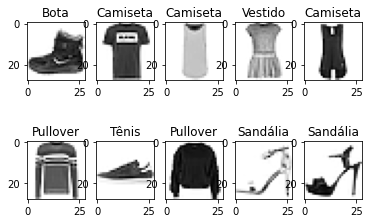

In [ ]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
                           
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem], cmap='Greys')
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

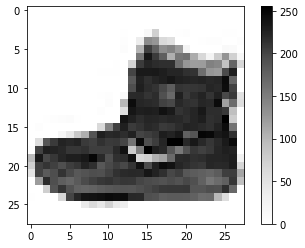

In [ ]:
plt.imshow(imagens_treino[0], cmap='Greys')
plt.colorbar()

**Normalizando as imagens**

In [ ]:
#normalização - os dados foram normalizados entre 0 e 1 para que fossem definidos em escala cinza e, assim, melhorar o aprendizado do modelo. 
imagens_treino = imagens_treino/float(255)

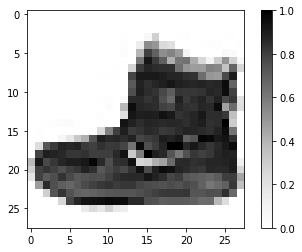

In [ ]:
plt.imshow(imagens_treino[0], cmap='Greys')
plt.colorbar()

**Criando, normalizando (com Dropout), compilando e treinando o modelo**

In [ ]:
# O modelo abaixo é composto por: 1 camada de entrada (tb chamada de camada 0) + 2 camadas de processamento (Dense/relu e Dropout, tb chamadas de camadas ocultas) + 1 camada de saida (softmax)
# Este modelo é uma Rede neural de 3 camadas, pois a camada 0 nao conta
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(128, activation=tensorflow.nn.relu),
    #keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) #10 porque é o total de classificações possiveis
    #processamento
    #saida
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2) #separa 20% dos dados (dos 60mil) para validacao

**Salvando e carregando o modelo treinado**

In [ ]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

**Visualizando as acurácias de treino e validação por época**

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


**Visualizando as perdas de treino e validação por época**

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

**Testando o modelo e o modelo salvo**

In [ ]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

**Avaliando o modelo (função evaluate)**

In [ ]:
# Devemos buscar nos nossos modelos sempre minimizar a perda e aumentar a acurácia de teste.

perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)